In [15]:
#loading libraries

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
#loding SIMD16 indicator data into dataframe called "Data".


Data = pd.read_csv("https://raw.githubusercontent.com/rakshitsidd/research-project-ml/master/data")
print (Data.shape)
Data.head()

(5684, 36)


,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,CIF,...,drive_secondary,PT_GP,PT_Post,PT_retail,crime_count,crime_rate,overcrowded_count,nocentralheat_count,overcrowded_rate,nocentralheat_rate
0,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,10.8,8.4,6.0,5.7,8,89,87,10.0,10%,1%
1,S01006507,Culter,Aberdeen City,830,491,7%,60,5%,25,40,...,11.5,8.3,7.3,6.8,4,48,85,4.0,10%,0%
2,S01006508,Culter,Aberdeen City,694,519,5%,30,3%,15,45,...,11.5,7.9,5.8,5.3,4,58,31,8.0,5%,1%
3,S01006509,Culter,Aberdeen City,573,354,5%,30,6%,20,65,...,10.8,7.4,8.3,8.4,*,*,42,6.0,7%,1%
4,S01006510,Culter,Aberdeen City,676,414,10%,70,7%,30,75,...,10.6,5.1,6.6,6.6,12,178,50,7.0,9%,1%


In [17]:
#loding "Postcode with SIMD rank" data into dataframe called "postcode".

postcode = pd.read_csv("https://raw.githubusercontent.com/rakshitsidd/research-project-ml/master/postcode")
print (postcode.shape)
postcode.head()

(43060, 6)


,Postcode,DZ,SIMD16_Rank,SIMD16_Vigintile,SIMD16_Decile,SIMD16_Quintile
0,AB1 0AA,S01006514,6808.0,20.0,10.0,5.0
1,AB1 0AB,S01006514,6808.0,20.0,10.0,5.0
2,AB1 0AD,S01006514,6808.0,20.0,10.0,5.0
3,AB1 0AE,S01006853,5503.0,16.0,8.0,4.0
4,AB1 0AF,S01006511,6668.0,20.0,10.0,5.0


In [18]:
# the below scritp changes the cloumn name from "DZ" to Data_Zone

postcode.rename(columns={'DZ':'Data_Zone'},inplace=True)
postcode.head()

,Postcode,Data_Zone,SIMD16_Rank,SIMD16_Vigintile,SIMD16_Decile,SIMD16_Quintile
0,AB1 0AA,S01006514,6808.0,20.0,10.0,5.0
1,AB1 0AB,S01006514,6808.0,20.0,10.0,5.0
2,AB1 0AD,S01006514,6808.0,20.0,10.0,5.0
3,AB1 0AE,S01006853,5503.0,16.0,8.0,4.0
4,AB1 0AF,S01006511,6668.0,20.0,10.0,5.0


In [19]:
#loding "SIMD16 ranks and domain ranks" data into dataframe called "SIMDRANK".

SIMDRANK = pd.read_csv("https://raw.githubusercontent.com/rakshitsidd/research-project-ml/master/SIMDRANK")
print (SIMDRANK.shape)
SIMDRANK.head()

(3235, 27)


,DZ,DZname,SIMD16_Rank,SIMD16_Vigintile,SIMD16_Decile,SIMD16_Quintile,SIMD16_Employment_Domain_Rank,SIMD16_Income_Domain_Rank,SIMD16_Education_Domain_Rank,SIMD16_Health_Domain_Rank,...,IZcode,IZname,LAcode,LAname,HBcode,HBname,MMWcode,MMWname,SPCcode,SPCname
0,S01006506,Culter - 01,5272,16,8,4,"4,260","4,513","5,367","4,906",...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const
1,S01006507,Culter - 02,4838,14,7,4,"4,830","4,334","4,017","5,070",...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const
2,S01006508,Culter - 03,6321,19,10,5,"6,101","5,266","6,032","5,837",...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const
3,S01006509,Culter - 04,5363,16,8,4,"4,599","5,002","4,914","3,958",...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const
4,S01006510,Culter - 05,4049,12,6,3,"4,055","3,341","3,509","3,028",...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const


In [20]:
# the below scritp changes the cloumn name from "DZ" to Data_Zone

SIMDRANK.rename(columns={'DZ':'Data_Zone'},inplace=True)
SIMDRANK.head()

,Data_Zone,DZname,SIMD16_Rank,SIMD16_Vigintile,SIMD16_Decile,SIMD16_Quintile,SIMD16_Employment_Domain_Rank,SIMD16_Income_Domain_Rank,SIMD16_Education_Domain_Rank,SIMD16_Health_Domain_Rank,...,IZcode,IZname,LAcode,LAname,HBcode,HBname,MMWcode,MMWname,SPCcode,SPCname
0,S01006506,Culter - 01,5272,16,8,4,"4,260","4,513","5,367","4,906",...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const
1,S01006507,Culter - 02,4838,14,7,4,"4,830","4,334","4,017","5,070",...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const
2,S01006508,Culter - 03,6321,19,10,5,"6,101","5,266","6,032","5,837",...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const
3,S01006509,Culter - 04,5363,16,8,4,"4,599","5,002","4,914","3,958",...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const
4,S01006510,Culter - 05,4049,12,6,3,"4,055","3,341","3,509","3,028",...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const


In [21]:
#the below script combines "Data" and "postcode" dataframes into MergedDataFrame1 dataframe.

MergedDataFrame1 = pd.merge(Data,postcode,on = 'Data_Zone')
MergedDataFrame1.head()

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,CIF,...,crime_rate,overcrowded_count,nocentralheat_count,overcrowded_rate,nocentralheat_rate,Postcode,SIMD16_Rank,SIMD16_Vigintile,SIMD16_Decile,SIMD16_Quintile
0,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,89,87,10.0,10%,1%,AB1 0AG,5272.0,16.0,8.0,4.0
1,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,89,87,10.0,10%,1%,AB1 0LE,5272.0,16.0,8.0,4.0
2,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,89,87,10.0,10%,1%,AB1 0LJ,5272.0,16.0,8.0,4.0
3,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,89,87,10.0,10%,1%,AB1 0LL,5272.0,16.0,8.0,4.0
4,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,89,87,10.0,10%,1%,AB1 0LN,5272.0,16.0,8.0,4.0


In [22]:
#the below script combines "MergedDataFrame1" and "SIMDRANK" dataframes into MergedDataFrame2 dataframe.

MergedDataFrame2=pd.merge(MergedDataFrame1,SIMDRANK,on='Data_Zone')
MergedDataFrame2.head()

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,CIF,...,IZcode,IZname,LAcode,LAname,HBcode,HBname,MMWcode,MMWname,SPCcode,SPCname
0,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const
1,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const
2,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const
3,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const
4,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,S02001236,Culter,S12000033,Aberdeen City,S08000020,Grampian,S13002484,Lower Deeside Ward,S16000076,Aberdeen South and North Kincardine P Const


In [23]:
#the below script checks for null values in the data.

MergedDataFrame2.isnull().sum()

Data_Zone                         0
Intermediate_Zone                 0
Council_area                      0
Total_population                  0
Working_age_population_revised    0
                                 ..
HBname                            0
MMWcode                           0
MMWname                           0
SPCcode                           0
SPCname                           0
Length: 67, dtype: int64

In [24]:
#the below script is used to drop those columns and final data is stored in "FinalCleanData" data frame.

FinalCleanData = MergedDataFrame2.drop(['LAname','HBcode','HBname','MMWcode','MMWname','SPCcode','SPCname','SIMD16_Rank_y','SIMD16_Vigintile_y','SIMD16_Decile_y','SIMD16_Quintile_y'], axis = 1)
FinalCleanData.head()

,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,CIF,...,SIMD16_Access_Domain_Rank,SIMD16_Crime_Domain_Rank,SIMD16_Housing_Domain_Rank,Population,Working_Age_Population_revised,URclass,URname,IZcode,IZname,LAcode
0,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,"5,065","5,519","3,248",904,605,3,Accessible Small Towns,S02001236,Culter,S12000033
1,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,"5,065","5,519","3,248",904,605,3,Accessible Small Towns,S02001236,Culter,S12000033
2,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,"5,065","5,519","3,248",904,605,3,Accessible Small Towns,S02001236,Culter,S12000033
3,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,"5,065","5,519","3,248",904,605,3,Accessible Small Towns,S02001236,Culter,S12000033
4,S01006506,Culter,Aberdeen City,904,605,7%,60,7%,40,60,...,"5,065","5,519","3,248",904,605,3,Accessible Small Towns,S02001236,Culter,S12000033


In [25]:
#the below script is run to confirm that there is no null values.

FinalCleanData.isnull().sum()

Data_Zone                         0
Intermediate_Zone                 0
Council_area                      0
Total_population                  0
Working_age_population_revised    0
Income_rate                       0
Income_count                      0
Employment_rate                   0
Employment_count                  0
CIF                               0
ALCOHOL                           0
DRUG                              0
SMR                               0
DEPRESS                           0
LBWT                              0
EMERG                             0
Attendance                        0
Attainment                        0
Noquals                           0
NEET                              0
HESA                              0
drive_petrol                      0
drive_GP                          0
drive_PO                          0
drive_primary                     0
drive_retail                      0
drive_secondary                   0
PT_GP                       

In [26]:
# the below script prints the data types of features

print(FinalCleanData.dtypes)

Data_Zone                          object
Intermediate_Zone                  object
Council_area                       object
Total_population                    int64
Working_age_population_revised      int64
Income_rate                        object
Income_count                        int64
Employment_rate                    object
Employment_count                    int64
CIF                                object
ALCOHOL                            object
DRUG                                int64
SMR                                 int64
DEPRESS                            object
LBWT                               object
EMERG                               int64
Attendance                         object
Attainment                         object
Noquals                             int64
NEET                               object
HESA                               object
drive_petrol                      float64
drive_GP                          float64
drive_PO                          

In [27]:
#prints the description of finalized cleaned data for building the model

FinalCleanData.describe()

,Total_population,Working_age_population_revised,Income_count,Employment_count,DRUG,SMR,EMERG,Noquals,drive_petrol,drive_GP,...,PT_retail,overcrowded_count,nocentralheat_count,SIMD16_Rank_x,SIMD16_Vigintile_x,SIMD16_Decile_x,SIMD16_Quintile_x,Population,Working_Age_Population_revised,URclass
count,39757.000000,39757.000000,39757.000000,39757.000000,39757.000000,39757.000000,39757.000000,39757.000000,39757.000000,39757.000000,...,39757.000000,39757.000000,39757.000000,39757.000000,39757.000000,39757.000000,39757.000000,39757.000000,39757.000000,39757.000000
mean,829.564328,558.457379,62.566341,35.418291,78.041502,94.666776,83.555726,81.769726,4.390832,3.964562,...,16.278814,78.363005,19.024574,4341.268355,12.954851,6.705888,3.579294,829.564328,558.457379,2.904118
std,224.804697,206.561956,55.203186,31.782450,145.925703,41.562413,25.928144,41.980944,3.015338,2.767327,...,10.990454,70.696127,16.828120,1701.443332,4.859527,2.432590,1.203105,224.804697,206.561956,1.945986
min,387.000000,224.000000,5.000000,0.000000,0.000000,0.000000,33.000000,4.000000,0.800000,0.800000,...,2.500000,0.000000,0.000000,36.000000,1.000000,1.000000,1.000000,387.000000,224.000000,1.000000
25%,676.000000,441.000000,25.000000,15.000000,0.000000,69.000000,65.000000,50.000000,2.200000,1.900000,...,7.700000,27.000000,7.000000,3147.000000,10.000000,5.000000,3.000000,676.000000,441.000000,1.000000
50%,820.000000,531.000000,45.000000,25.000000,28.000000,89.000000,76.000000,73.000000,3.300000,2.900000,...,12.100000,52.000000,14.000000,4603.000000,14.000000,7.000000,4.000000,820.000000,531.000000,2.000000
75%,958.000000,634.000000,85.000000,45.000000,94.000000,112.000000,97.000000,108.000000,5.700000,5.600000,...,22.700000,109.000000,27.000000,5665.000000,17.000000,9.000000,5.000000,958.000000,634.000000,5.000000
max,2744.000000,2631.000000,405.000000,210.000000,1438.000000,340.000000,185.000000,234.000000,16.600000,14.000000,...,63.200000,412.000000,136.000000,6975.000000,20.000000,10.000000,5.000000,2744.000000,2631.000000,6.000000


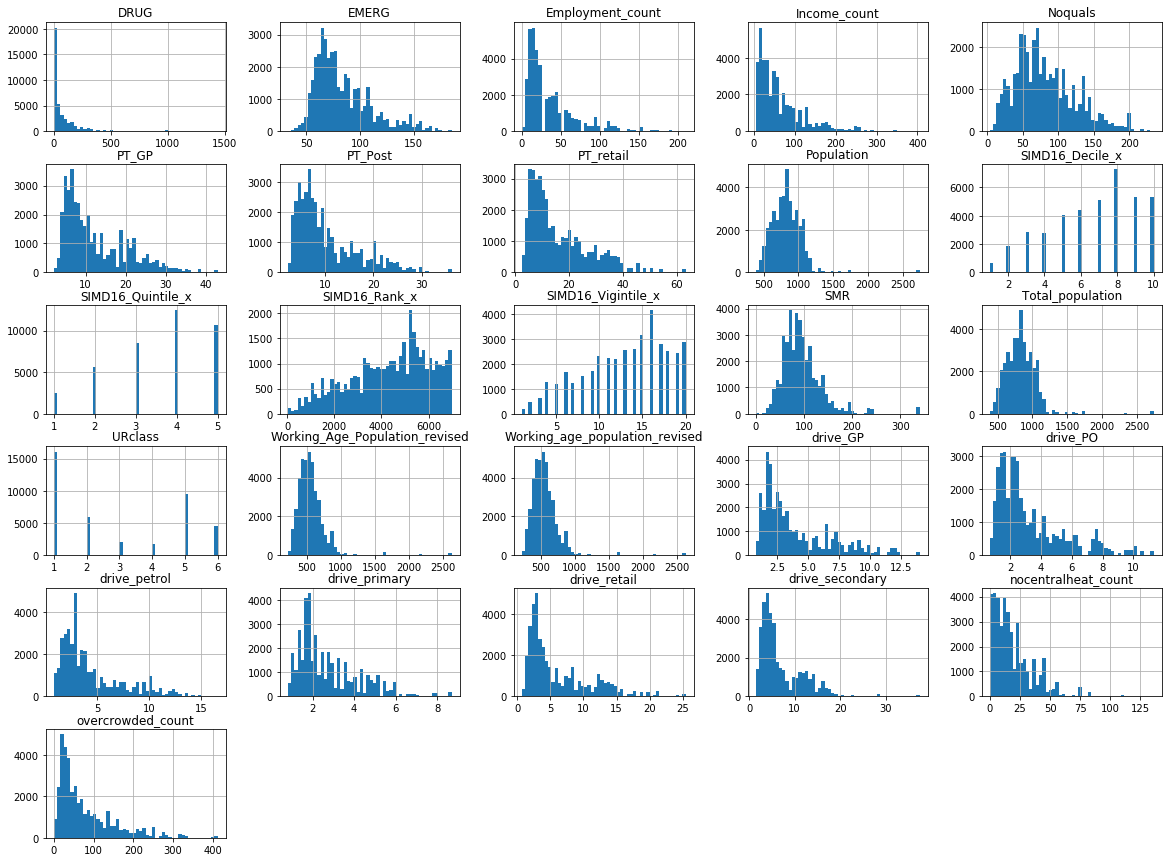

In [28]:
#Dat Visualization of distribution of each column / feature data

%matplotlib inline 
import matplotlib.pyplot as plt 
FinalCleanData.hist(bins=50, figsize=(20,15)) 
plt.show()

In [29]:
# prints the data types of each feature

print(FinalCleanData.dtypes)

Data_Zone                          object
Intermediate_Zone                  object
Council_area                       object
Total_population                    int64
Working_age_population_revised      int64
Income_rate                        object
Income_count                        int64
Employment_rate                    object
Employment_count                    int64
CIF                                object
ALCOHOL                            object
DRUG                                int64
SMR                                 int64
DEPRESS                            object
LBWT                               object
EMERG                               int64
Attendance                         object
Attainment                         object
Noquals                             int64
NEET                               object
HESA                               object
drive_petrol                      float64
drive_GP                          float64
drive_PO                          

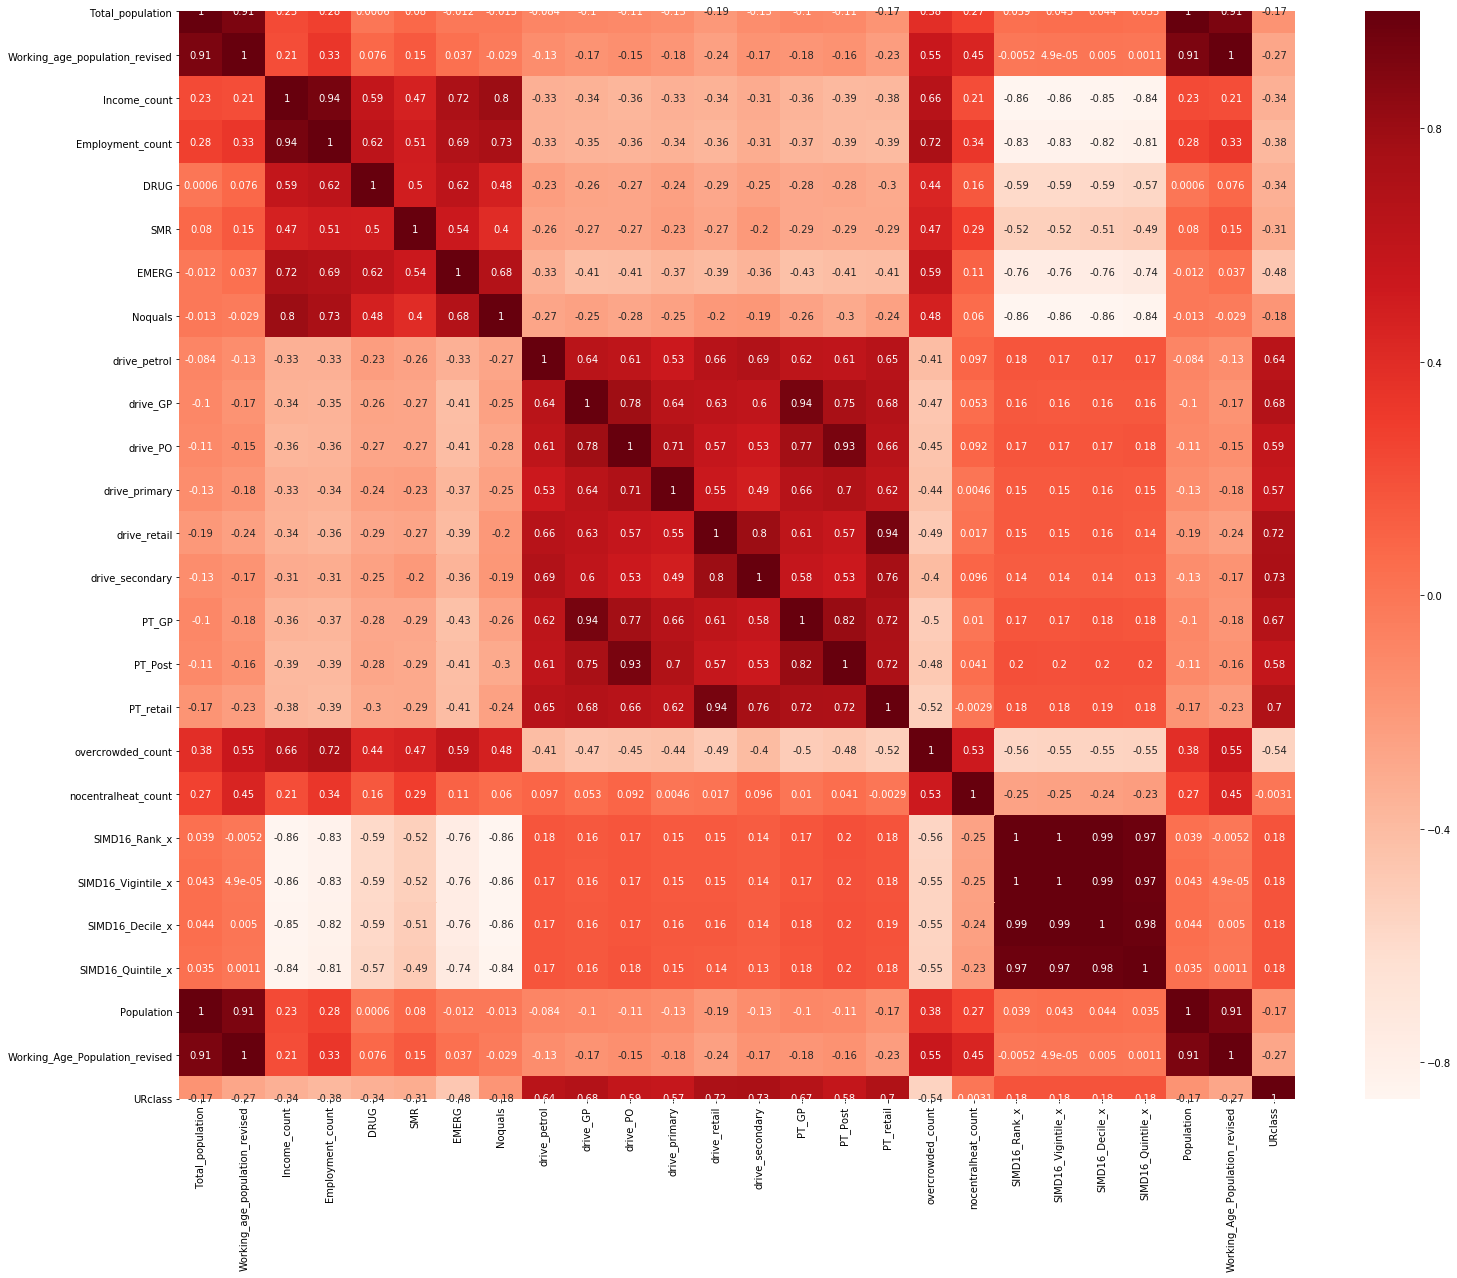

In [30]:
# plotted the Pearson correlation heatmap

import seaborn as sns;
plt.figure(figsize=(25,20))
cor = FinalCleanData.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [31]:
#Correlation with output variable

cor_target = abs(cor["SIMD16_Quintile_x"])

#Selecting correlated features with atleast 50% correlation from the heatmap

relevant_features = cor_target[cor_target>0.5]
relevant_features

Income_count          0.844613
Employment_count      0.811981
DRUG                  0.570656
EMERG                 0.744598
Noquals               0.840541
overcrowded_count     0.546547
SIMD16_Rank_x         0.971251
SIMD16_Vigintile_x    0.973061
SIMD16_Decile_x       0.978895
SIMD16_Quintile_x     1.000000
Name: SIMD16_Quintile_x, dtype: float64

In [32]:
relevant_features.shape

(10,)

In [33]:
# assigning input variables to a variable 'X' 

X = FinalCleanData.get(['Income_count','Employment_count','DRUG','EMERG','Noquals','SIMD16_Rank_x','SIMD16_Vigintile_x','SIMD16_Decile_x'])
X.sample(5)

,Income_count,Employment_count,DRUG,EMERG,Noquals,SIMD16_Rank_x,SIMD16_Vigintile_x,SIMD16_Decile_x
27112,70,25,0,92,87,4603.0,14.0,7.0
22685,20,15,47,65,56,6226.0,18.0,9.0
39427,100,70,103,113,126,2589.0,8.0,4.0
2117,5,10,0,51,25,6766.0,20.0,10.0
30336,35,25,0,90,77,3790.0,11.0,6.0


In [34]:
X.shape

(39757, 8)

In [35]:
# assigning Output variables to a variable 'y'

y = FinalCleanData.get(['SIMD16_Quintile_x'])
y.sample(5)

,SIMD16_Quintile_x
19789,4.0
13384,3.0
31466,4.0
33069,4.0
36691,4.0


In [36]:
y.shape

(39757, 1)

In [37]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
# the below code splites the data into 70% training data and 30% testing data. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)
print (X_train.shape)

(27829, 8)


In [39]:
# Feature Scaling


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scaler = MinMaxScaler()

In [40]:
# feature scaling is a good practice.
# the below shows feature scaling of input and output.

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [42]:
X_scaled[27829]

array([0.0875    , 0.07142857, 0.        , 0.23026316, 0.29565217,
       0.57284911, 0.57894737, 0.55555556])

In [43]:
y_scaled[27829]

array([0.5])

In [44]:
print(X_train.shape,  y_train.shape, X_test.shape, y_test.shape)

(27829, 8) (27829, 1) (11928, 8) (11928, 1)


In [45]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [46]:
#Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [47]:
#the below code shows the Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [49]:
print(list(zip(y_pred, clf.feature_importances_)))
joblib.dump(clf, 'deprivedareamodel.pkl')

[(4.0, 0.0580863544504431), (1.0, 0.04008752315224618), (4.0, 0.001687478560841073), (2.0, 0.017983422045821505), (2.0, 0.03730748204967235), (4.0, 0.267574254931967), (3.0, 0.28852292517730366), (4.0, 0.28875055963170515)]


['deprivedareamodel.pkl']

In [50]:
print(list(zip(y_test, clf.feature_importances_)))
joblib.dump(clf, 'deprivedareamodel.pkl')

[('SIMD16_Quintile_x', 0.0580863544504431)]


['deprivedareamodel.pkl']

In [51]:
# Evaluating the performance of the classifier using Confusion Matrix.

print(confusion_matrix(y_test,y_pred))

[[ 775    0    0    0    0]
 [   0 1685    0    0    0]
 [   0    0 2558    0    0]
 [   0    0    0 3685    0]
 [   0    0    0    0 3225]]


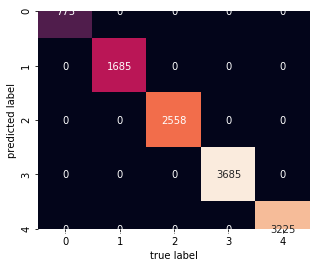

In [52]:
# Evaluating the performance of the classifier using Confusion Matrix can be show using heatmap.

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [53]:
# the below code shows ow accuatly the prediction is done by the Random forest algorithm 


print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy Score: 100.0 %


In [54]:
#example of prediction 1
# input variables 

Xforprediction = FinalCleanData.get(['Income_count','Employment_count','DRUG','EMERG','Noquals','SIMD16_Rank_x','SIMD16_Vigintile_x','SIMD16_Decile_x'])
Xforprediction.iloc[5500,:]

Income_count           125.0
Employment_count        75.0
DRUG                   303.0
EMERG                  117.0
Noquals                142.0
SIMD16_Rank_x         1908.0
SIMD16_Vigintile_x       6.0
SIMD16_Decile_x          3.0
Name: 5500, dtype: float64

In [55]:
# Output variables

yforprediction = FinalCleanData.get(['SIMD16_Quintile_x'])
yforprediction.iloc[5500,:]

SIMD16_Quintile_x    2.0
Name: 5500, dtype: float64

In [58]:
#example of prediction 2
# input variables 

Xforprediction = FinalCleanData.get(['Income_count','Employment_count','DRUG','EMERG','Noquals','SIMD16_Rank_x','SIMD16_Vigintile_x','SIMD16_Decile_x'])
Xforprediction.iloc[1500,:]

Income_count            20.0
Employment_count         5.0
DRUG                    83.0
EMERG                   77.0
Noquals                 26.0
SIMD16_Rank_x         6538.0
SIMD16_Vigintile_x      19.0
SIMD16_Decile_x         10.0
Name: 1500, dtype: float64

In [61]:
# Output variables

yforprediction = FinalCleanData.get(['SIMD16_Quintile_x'])
yforprediction.iloc[1500,:]

SIMD16_Quintile_x    5.0
Name: 1500, dtype: float64

In [65]:
#example of prediction 3
# input variables 

Xforprediction = FinalCleanData.get(['Income_count','Employment_count','DRUG','EMERG','Noquals','SIMD16_Rank_x','SIMD16_Vigintile_x','SIMD16_Decile_x'])
Xforprediction.iloc[18500,:]

Income_count            25.0
Employment_count        15.0
DRUG                     0.0
EMERG                   63.0
Noquals                 60.0
SIMD16_Rank_x         5492.0
SIMD16_Vigintile_x      16.0
SIMD16_Decile_x          8.0
Name: 18500, dtype: float64

In [66]:
# Output variables

yforprediction = FinalCleanData.get(['SIMD16_Quintile_x'])
yforprediction.iloc[18500,:]

SIMD16_Quintile_x    4.0
Name: 18500, dtype: float64